In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]

import copy

from astropy.io import fits

import numpy as np
import pickle
import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra
import darkhistory.history.tla as tla

import main

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.ics.ics_cooling import get_ics_cooling_tf

from darkhistory.electrons import positronium as ps

np.set_printoptions(threshold=np.nan)

In [4]:
phys.rho_DM
phys.hubble(1)


2.1749739610571087e-18

In [60]:
%autoreload

a_vec = np.array([1, 2, 3])
b_vec = np.array([4, 5, 6])
eng = np.array([0.1, 1, 10])

a = Spectrum(eng, a_vec, spec_type='N')
b = Spectrum(eng, b_vec, spec_type='N')

test_bound = [1e-9, 10**-1.5, 10**-0.5, 10**0.5]

print('**** SPECTRUM TEST ****')

print('sum: ', np.sum(a_vec))
print('dot with eng: ', np.dot(a_vec, eng))
print('totN(): ', a.totN())
print('toteng(): ', a.toteng())
print('totN slice: ', a.totN(bound_type='eng', bound_arr=test_bound))
print('toteng slice: ', a.toteng(bound_type='eng', bound_arr=test_bound))

print('sum: ', np.sum(b_vec))
print('dot with eng: ', np.dot(b_vec, eng))
print('totN(): ', b.totN())
print('toteng(): ', b.toteng())
print('totN slice: ', b.totN(bound_type='eng', bound_arr=test_bound))
print('toteng slice: ', b.toteng(bound_type='eng', bound_arr=test_bound))


specs = Spectra([a, b])

print('**** SPECTRA TEST ****')

print('totN(): ', specs.totN(bound_type='eng', bound_arr=test_bound))
print('toteng(): ', specs.toteng(bound_type='eng', bound_arr=test_bound))

**** SPECTRUM TEST ****
sum:  6
dot with eng:  32.1
totN():  6.0
toteng():  32.1
totN slice:  [0. 1. 2.]
toteng slice:  [0.  0.1 2. ]
sum:  15
dot with eng:  65.4
totN():  15.0
toteng():  65.4
totN slice:  [0. 4. 5.]
toteng slice:  [0.  0.4 5. ]
**** SPECTRA TEST ****
totN():  [[0. 0.]
 [1. 4.]
 [2. 5.]]
toteng():  [[0.  0. ]
 [0.1 0.4]
 [2.  5. ]]


In [47]:
a = np.array([1, 2, 3])
a[-1:2]

array([], dtype=int64)

In [24]:
chan = 'phot'

hdul = fits.open(
        '/Users/hongwan/Dropbox (MIT)/Photon Deposition/idl_comparison/final_darkhistory_comparison/'
        +'tf_'+chan+'_z_3.000E+03_nstep_6622_logE_1.230E+01_xe_0.000E+00.fits'
    )

data = hdul[1].data
idl_energy = data.field('energy')[0]

a = ps.weighted_photon_spec(idl_energy)
# a = ps.ortho_photon_spec(idl_energy)*3/4
utils.compare_arr([a.eng, a.dNdE])



[[1.03931104e-04 1.67402686e-15]
 [1.12262993e-04 1.80822929e-15]
 [1.21262829e-04 1.95319039e-15]
 [1.30984159e-04 2.10977265e-15]
 [1.41484823e-04 2.27890770e-15]
 [1.52827298e-04 2.46160188e-15]
 [1.65079070e-04 2.65894219e-15]
 [1.78313035e-04 2.87210275e-15]
 [1.92607933e-04 3.10235186e-15]
 [2.08048817e-04 3.35105944e-15]
 [2.24727556e-04 3.61970527e-15]
 [2.42743387e-04 3.90988775e-15]
 [2.62203501e-04 4.22333341e-15]
 [2.83223683e-04 4.56190721e-15]
 [3.05928998e-04 4.92762360e-15]
 [3.30454541e-04 5.32265853e-15]
 [3.56946233e-04 5.74936240e-15]
 [3.85561696e-04 6.21027402e-15]
 [4.16471187e-04 6.70813574e-15]
 [4.49858613e-04 7.24590976e-15]
 [4.85922622e-04 7.82679574e-15]
 [5.24877791e-04 8.45424986e-15]
 [5.66955896e-04 9.13200536e-15]
 [6.12407295e-04 9.86409479e-15]
 [6.61502415e-04 1.06548739e-14]
 [7.14533365e-04 1.15090478e-14]
 [7.71815671e-04 1.24316986e-14]
 [8.33690151e-04 1.34283160e-14]
 [9.00524950e-04 1.45048296e-14]
 [9.72717723e-04 1.56676446e-14]
 [1.050698

0

3.653241978916525e-18

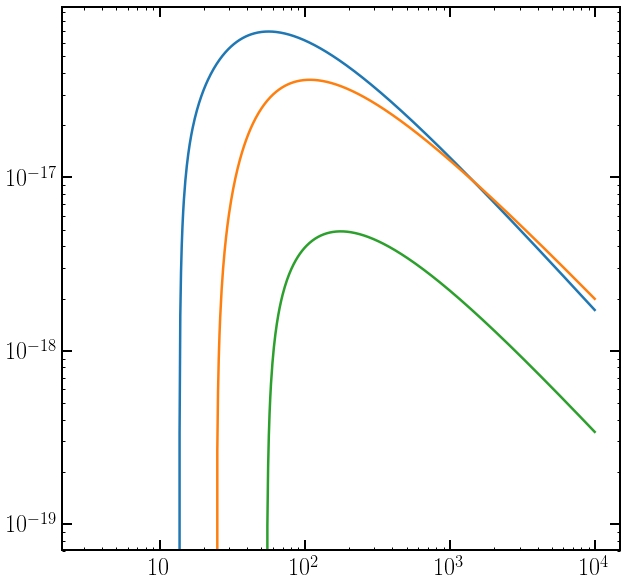

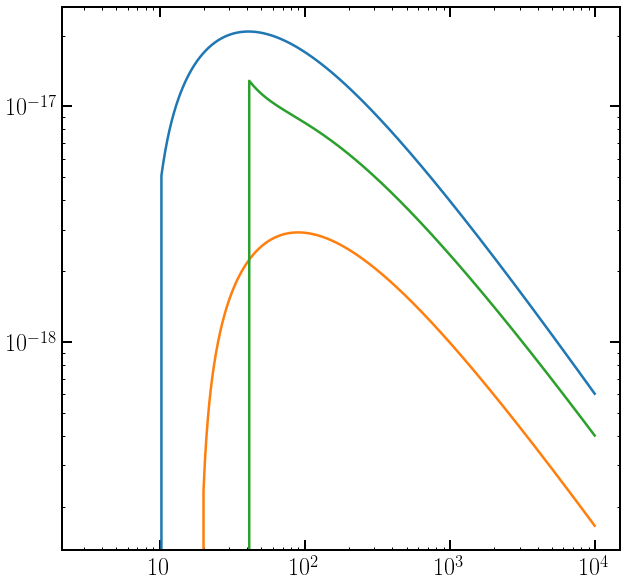

In [24]:
eng = 10**np.arange(0.5, 4, 0.005)

plt.figure()
ax = plt.gca()
ax.loglog()

plt.plot(eng, phys.coll_ion_xsec(eng, species='H0'))
plt.plot(eng, phys.coll_ion_xsec(eng, species='He0'))
plt.plot(eng, phys.coll_ion_xsec(eng, species='He1'))

plt.figure()
ax = plt.gca()
ax.loglog()

plt.plot(eng, phys.coll_exc_xsec(eng, species='H0'))
plt.plot(eng, phys.coll_exc_xsec(eng, species='He0'))
plt.plot(eng, phys.coll_exc_xsec(eng, species='He1'))

phys.coll_ion_xsec(450, species='He1')

45.27001355405114


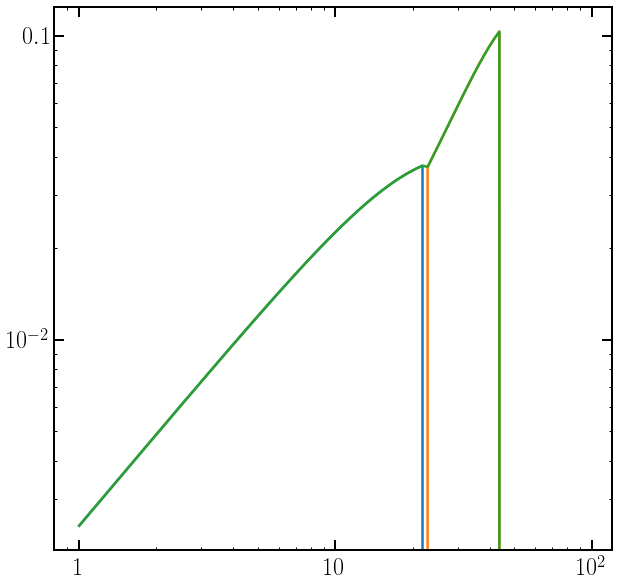

In [112]:
eng = 10**np.arange(0, 2, 0.02)

injE = 100
eps_i = 32.6
ion_pot = 54.4

dNdE_1 = 1/(1 + (eng/eps_i)**2.1)
dNdE_1[eng > (injE - ion_pot)/2] = 0

a = Spectrum(eng, dNdE_1)
a /= a.totN()

dNdE_2 = np.zeros_like(eng)

dNdE_2[eng < injE - ion_pot] = (
    1/(1 + ((injE - eng[eng < injE - ion_pot] - ion_pot)/eps_i)**2.1)
)
dNdE_2[eng < (injE - ion_pot)/2] = 0

b = Spectrum(eng, dNdE_2)
b /= b.totN()

plt.figure()
ax = plt.gca()
ax.loglog()

plt.plot(eng, a.N)
plt.plot(eng, b.N)

print(a.toteng() + b.toteng())

plt.plot(eng, phys.coll_ion_sec_elec_spec(injE, eng, species='HeII'))

In [114]:
utils.compare_arr([eng, a.dNdE, b.dNdE])

[[1.00000000e+00 5.31430595e-02 0.00000000e+00]
 [1.04712855e+00 5.31394785e-02 0.00000000e+00]
 [1.09647820e+00 5.31355344e-02 0.00000000e+00]
 [1.14815362e+00 5.31311906e-02 0.00000000e+00]
 [1.20226443e+00 5.31264065e-02 0.00000000e+00]
 [1.25892541e+00 5.31211375e-02 0.00000000e+00]
 [1.31825674e+00 5.31153349e-02 0.00000000e+00]
 [1.38038426e+00 5.31089444e-02 0.00000000e+00]
 [1.44543977e+00 5.31019069e-02 0.00000000e+00]
 [1.51356125e+00 5.30941569e-02 0.00000000e+00]
 [1.58489319e+00 5.30856227e-02 0.00000000e+00]
 [1.65958691e+00 5.30762250e-02 0.00000000e+00]
 [1.73780083e+00 5.30658770e-02 0.00000000e+00]
 [1.81970086e+00 5.30544829e-02 0.00000000e+00]
 [1.90546072e+00 5.30419375e-02 0.00000000e+00]
 [1.99526231e+00 5.30281252e-02 0.00000000e+00]
 [2.08929613e+00 5.30129186e-02 0.00000000e+00]
 [2.18776162e+00 5.29961781e-02 0.00000000e+00]
 [2.29086765e+00 5.29777500e-02 0.00000000e+00]
 [2.39883292e+00 5.29574656e-02 0.00000000e+00]
 [2.51188643e+00 5.29351394e-02 0.000000

0

## Transfer Function Abscissa

In [512]:
# Redshift

dlnz = 1e-3
nzsteps = 51
initredshift = 3000
finredshift = 4
lnzstep = (np.log(initredshift) - np.log(finredshift))/(nzsteps-1)
redshiftgrid = np.exp(np.log(4.) + lnzstep*np.arange(nzsteps))
print('Redshift: ', redshiftgrid)

# Injection energies

mmin = 5e3
mmax = 1e13
nmwimpsteps = 40
mwimp = mmin*np.exp((np.arange(nmwimpsteps))*np.log(mmax/mmin)/nmwimpsteps)
mwimpmax = mwimp[-1]


nengsteps = 51
lowinjE = 60
injE = lowinjE*np.exp((np.arange(nengsteps)*np.log(mwimpmax/lowinjE)/nengsteps))
injE = injE[1:]
injE = np.insert(injE, 0, 61.)
print(injE)

# Ionization

nxesteps = 11
xe = 0.5 + 0.5*np.tanh([-5., -4.1, -3.2, -2.3, -1.4, -0.5, 0.4, 1.3, 2.2, 3.1, 4.])

Redshift:  [ 4.          4.16721613  4.34142257  4.52291154  4.71198748  4.90896755
  5.11418219  5.32797563  5.5507065   5.78274841  6.02449061  6.27633861
  6.53871487  6.81205952  7.09683108  7.39350723  7.70258565  8.02458479
  8.36004479  8.70952837  9.07362178  9.45293576  9.84810659 10.25979715
 10.68869805 11.13552873 11.60103873 12.08600893 12.59125283 13.11761798
 13.6659873  14.23728068 14.83245642 15.45251291 16.09849025 16.77147206
 17.47258722 18.20301182 18.96397112 19.75674158 20.58265304 21.44309094
 22.3394986  23.27337973 24.24630085 25.25989399 26.31585941 27.41596845
 28.56206648 29.75607604 31.        ]
[6.10000000e+01 9.85435428e+01 1.61847164e+02 2.65816549e+02
 4.36575074e+02 7.17027576e+02 1.17764063e+03 1.93414799e+03
 3.17662993e+03 5.21727279e+03 8.56880907e+03 1.40733467e+04
 2.31139574e+04 3.79621876e+04 6.23488076e+04 1.02401207e+05
 1.68182961e+05 2.76222414e+05 4.53665589e+05 7.45096906e+05
 1.22374148e+06 2.00986368e+06 3.30098480e+06 5.42151229e+06
 

In [511]:
dlnphoteng = np.log(5565952217145.328/1e-4)/500
photbinbounds = 1e-4*np.exp(np.arange(501)*dlnphoteng)
photeng = np.sqrt(photbinbounds[1:]*photbinbounds[:-1])
print(photeng[173:])
print(photeng[173:].shape)
# utils.compare_arr([photeng, idl_energy])

[6.46699012e+01 6.98543211e+01 7.54543627e+01 8.15033452e+01
 8.80372591e+01 9.50949801e+01 1.02718501e+02 1.10953179e+02
 1.19848010e+02 1.29455918e+02 1.39834066e+02 1.51044204e+02
 1.63153030e+02 1.76232590e+02 1.90360704e+02 2.05621433e+02
 2.22105575e+02 2.39911209e+02 2.59144275e+02 2.79919206e+02
 3.02359610e+02 3.26599003e+02 3.52781607e+02 3.81063203e+02
 4.11612061e+02 4.44609943e+02 4.80253181e+02 5.18753845e+02
 5.60341009e+02 6.05262109e+02 6.53784418e+02 7.06196636e+02
 7.62810608e+02 8.23963175e+02 8.90018188e+02 9.61368660e+02
 1.03843912e+03 1.12168812e+03 1.21161097e+03 1.30874271e+03
 1.41366126e+03 1.52699085e+03 1.64940578e+03 1.78163441e+03
 1.92446347e+03 2.07874276e+03 2.24539023e+03 2.42539740e+03
 2.61983528e+03 2.82986075e+03 3.05672342e+03 3.30177309e+03
 3.56646776e+03 3.85238232e+03 4.16121792e+03 4.49481208e+03
 4.85514962e+03 5.24437450e+03 5.66480254e+03 6.11893522e+03
 6.60947454e+03 7.13933915e+03 7.71168164e+03 8.32990735e+03
 8.99769464e+03 9.719016

In [526]:
hdul = fits.open(
    '/Users/hongwan/Dropbox (MIT)/Photon Deposition/idl_comparison/tf_z_2.915E+01_nstep_3_logE_5.657E+00_xe_2.746E-04.fits'
)
data = hdul[1].data

idl_photonspectrum = data.field('photonspectrum')[0]
idl_lowengphot = data.field('lowengphot')[0]
idl_lowengelec = data.field('lowengelec')[0]
idl_energy = data.field('energy')[0]
idl_eleceng = data.field('eleceng')[0]
idl_redshift = data.field('redshift')[0]
idl_cmblosstable = data.field('cmblosstable')[0]

idl_bin_width = np.diff(spectools.get_bin_bound(data.field('energy')[0]))



453941.61665020324


## Transfer Function Comparisons

In [520]:
highengphot_tflist_arr_raw = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/tfunclist_photspec_60eV_injE_complete_rs_30_xe_2pts.raw", "rb"))
lowengphot_tflist_arr_raw  = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/tfunclist_lowengphotspec_60eV_injE_complete_rs_30_xe_2pts.raw", "rb"))
lowengelec_tflist_arr_raw  = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/tfunclist_lowengelecspec_60eV_injE_complete_rs_30_xe_2pts.raw", "rb"))
CMB_engloss_raw = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/CMB_engloss_60eV_injE_complete_rs_30_xe_2pts.raw", "rb"))


29.756074714651266
dNdE
6609.474543020536
[[1.03931104e-04 1.19065953e+01]
 [1.12262993e-04 1.28533211e+01]
 [1.21262829e-04 1.38746570e+01]
 [1.30984159e-04 1.49763503e+01]
 [1.41484823e-04 1.61645996e+01]
 [1.52827298e-04 1.74460641e+01]
 [1.65079070e-04 1.88278533e+01]
 [1.78313035e-04 2.03176232e+01]
 [1.92607933e-04 2.19235928e+01]
 [2.08048817e-04 2.36545076e+01]
 [2.24727556e-04 2.55197482e+01]
 [2.42743387e-04 2.75293956e+01]
 [2.62203501e-04 2.96941413e+01]
 [2.83223683e-04 3.20254436e+01]
 [3.05928998e-04 3.45354648e+01]
 [3.30454541e-04 3.72372832e+01]
 [3.56946233e-04 4.01446158e+01]
 [3.85561696e-04 4.32721645e+01]
 [4.16471187e-04 4.66354703e+01]
 [4.49858613e-04 5.02509366e+01]
 [4.85922622e-04 5.41359705e+01]
 [5.24877791e-04 5.83089251e+01]
 [5.66955896e-04 6.27888595e+01]
 [6.12407295e-04 6.75960693e+01]
 [6.61502415e-04 7.27514756e+01]
 [7.14533365e-04 7.82770831e+01]
 [7.71815671e-04 8.41953889e+01]
 [8.33690151e-04 9.05300195e+01]
 [9.00524950e-04 9.73048913e+01]
 

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


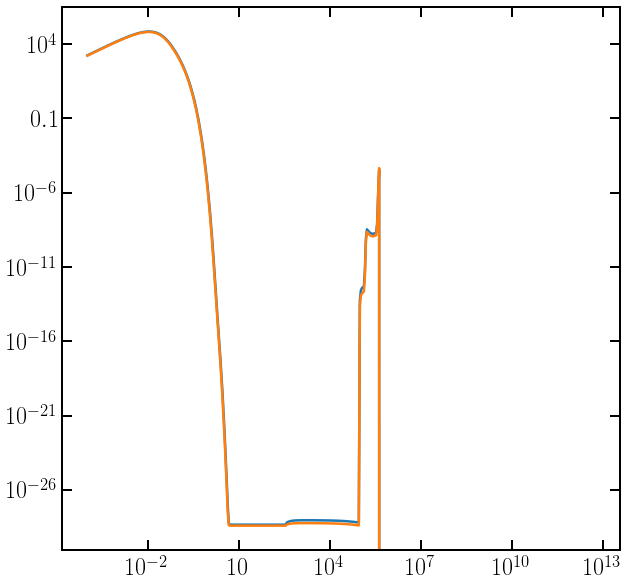

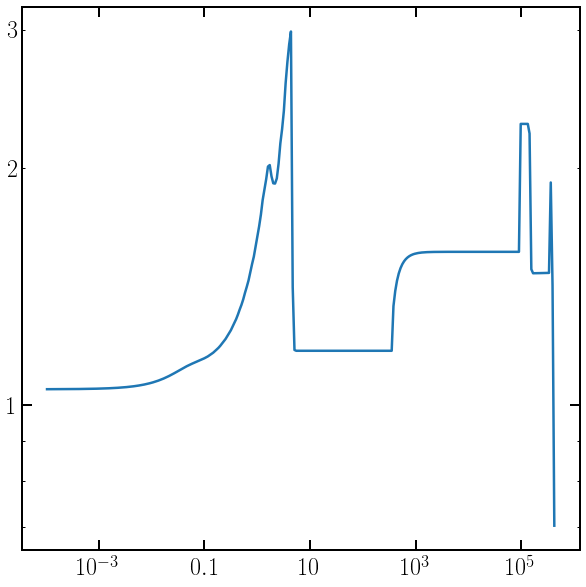

In [553]:
print(highengphot_tflist_arr_raw[1].rs[49])
# highengphot_tflist_arr_raw[0][15][114]

plt.figure()
ax = plt.gca()

ax.loglog()

b = highengphot_tflist_arr_raw[1][49]
if b.spec_type != 'dNdE':
    b.switch_spec_type()

print(b.spec_type)

# print(b.in_eng)

print(b.in_eng[60])

def rate_func_N(rs):
    return phys.inj_rate('decay', rs, mDM=4.53665589e+05, tau=1e25)/4.53665589e+05

norm_fac = rate_func_N(29.14596039) * 0.002 / phys.hubble(29.14596039) / (phys.nB * 29.14596039**3)

extra_fac = 4.53665589e+05/425290.02570297435

b.plot(ax=ax, ind=115, indtype='ind')
plt.plot(idl_energy, idl_photonspectrum[2]/norm_fac/(2*extra_fac))

plt.figure()
ax = plt.gca()
ax.loglog()

# utils.compare_arr([idl_energy, b[114].eng])

utils.compare_arr([b[60].eng, b[60].dNdE])

# utils.compare_arr([
#     b[115].eng, 
#                    b[115].dNdE,
#                    idl_photonspectrum[2]/norm_fac/(2*extra_fac)]
#                  )

plt.plot(idl_energy, b[115].dNdE/(idl_photonspectrum[2]/norm_fac/(2*extra_fac)))

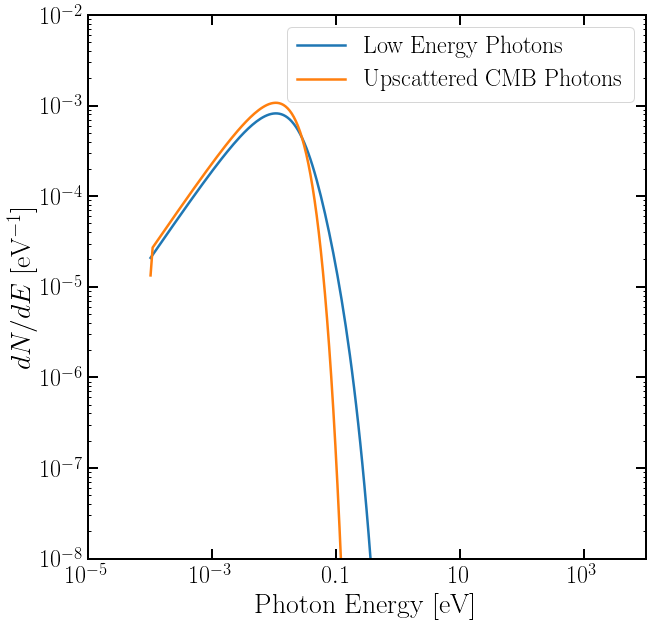

In [535]:
#phys.CMB_eng_density

cmbloss = idl_cmblosstable[1] # dE/dt
cmbloss *= 0.001/phys.hubble(idl_redshift[0]) # per baryon in this timestep


test_CMB_spec = spectools.discretize(idl_energy, phys.CMB_spec, phys.TCMB(idl_redshift[2]))
test_CMB_spec = (
    test_CMB_spec/test_CMB_spec.toteng()*cmbloss
#     *(cmbloss_idl_new[i] + cmbloss_idl_new[i+1])
#     *0.002/phys.hubble(lowengphot_spec_idl_new.rs)
#     /(phys.nB*lowengphot_spec_idl_new.rs**3)
)


plt.figure()

ax = plt.gca()
ax.loglog()

lowengphot_plot, = plt.plot(idl_energy, (idl_lowengphot[1] + idl_lowengphot[2]))
# plt.plot(idl_energy, idl_photonspectrum[1])
# plt.plot(idl_energy, idl_photonspectrum[2])
cmbloss_plot, = plt.plot(test_CMB_spec.eng, test_CMB_spec.dNdE)
plt.axis([1e-5, 1e4, 1e-8, 1e-2])

plt.xlabel('Photon Energy [eV]')
plt.ylabel(r'$dN/dE$ [eV$^{-1}$]')

ax.legend((lowengphot_plot, cmbloss_plot), ('Low Energy Photons', 'Upscattered CMB Photons'))

In [538]:
print(test_CMB_spec.toteng(bound_arr=np.array([1e-5, 0.1]), bound_type='eng'))
print(np.dot((idl_lowengphot[2]), idl_bin_width*idl_energy))


[5.01921185e-07]
7.397912804146717e-07


In [271]:
user = '/Users/hongwan/Dropbox (MIT)/Photon Deposition/'
highengphot_tf_interp, lowengphot_tf_interp, lowengelec_tf_interp, CMB_engloss_arr = main.load_trans_funcs(user)#+'/Dropbox (MIT)/Photon Deposition/')



Loading transfer functions...
Loaded high energy photons...
Low energy photons...
Low energy electrons...
CMB losses.

Padding tflists with zeros...
high energy photons...
low energy photons...
low energy electrons...

CMB losses.

Generating TransferFuncInterp objects for each tflist...
Done.



425290.02570297435


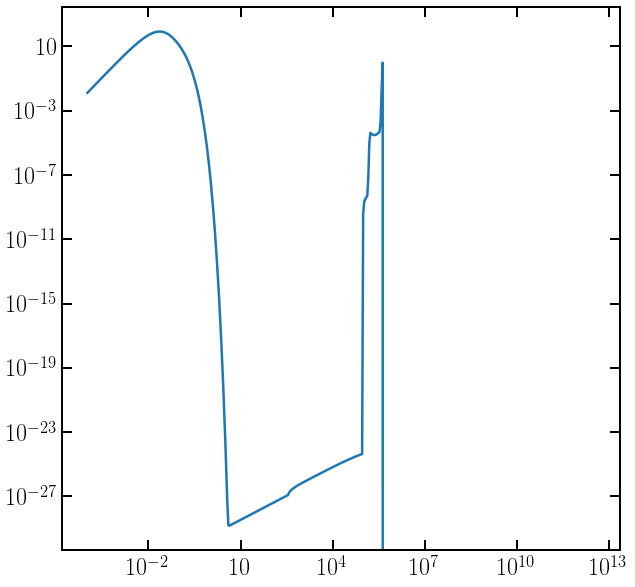

In [272]:
plt.figure()

ax = plt.gca()
ax.loglog()

c = highengphot_tf_interp.get_tf(30, 2e-4)

print(c.in_eng[287])

c.plot(ax=ax, ind=287, indtype='ind')

In [345]:
inj_type = 'decay'
inj_particle = 'photon'

mDM = 6e5*2
# sigmav = 3e-26
tau = 1e25

if inj_type == 'decay':
    Ecom = mDM
else:
    Ecom = 2*mDM
    
if inj_particle is "electron":
    rest_energy = phys.me
elif inj_particle is "photon":
    rest_energy = 0
else:
    raise TypeError('Specify either electron or photon final state')

eng = highengphot_tf_interp.eng
if inj_type == 'decay':
    indx = np.where(eng < mDM/2 - rest_energy)[-1][-1]
    fac = (mDM/2 - rest_energy)/eng[indx]
    spec_arr = np.zeros_like(eng)
    spec_arr[indx] = 2*fac
    tmp_spec = Spectrum(
        eng, spec_arr,
        spec_type = 'N'
    )
#     tmp_spec = spectools.rebin_N_arr(
#         np.array([2]), # Number of particles in each bin
#         np.array([mDM/2 - rest_energy]), # Energy of particles
#         eng # Desired energy abscissa of tmp_spec
#     )
else:
    tmp_spec = spectools.rebin_N_arr(np.array([2]), np.array([mDM - rest_energy]), eng)
    
tmp_spec.rs = 30
# tmp_spec.switch_spec_type()

if inj_particle is "electron":
    elec_spec_init =   tmp_spec
    phot_spec_init = 0*tmp_spec
else:
    phot_spec_init =   tmp_spec
    elec_spec_init = 0*tmp_spec
    
def rate_func_N(rs):
    return phys.inj_rate(inj_type, rs, mDM=mDM, sigmav=sigmav, tau=tau)/Ecom
def rate_func_eng(rs):
    return phys.inj_rate(inj_type, rs, mDM=mDM, sigmav=sigmav, tau=tau)  

In [346]:
end_rs = 5
std_soln=True
coarsen_factor = 1

a1 = main.evolve(
    elec_spec_init, phot_spec_init,
    rate_func_N, rate_func_eng, end_rs,
    highengphot_tf_interp, lowengphot_tf_interp, lowengelec_tf_interp,
    #ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf
    coarsen_factor=coarsen_factor, std_soln=std_soln
)
print('Done 1')

Done 1


In [347]:
hdul = fits.open(
    '/Users/hongwan/Dropbox (MIT)/Photon Deposition/idl_comparison/tf_z_3.000E+01_nstep_1793_logE_5.778E+00_xe_0.000E+00.fits'
)
data = hdul[1].data

idl_photonspectrum = data.field('photonspectrum')[0]
idl_lowengphot = data.field('lowengphot')[0]
idl_lowengelec = data.field('lowengelec')[0]
idl_energy = data.field('energy')[0]
idl_eleceng = data.field('eleceng')[0]

idl_bin_width = np.diff(spectools.get_bin_bound(data.field('energy')[0]))



In [348]:
np.log10(6e5)

5.778151250383644

In [349]:
highengphot_spectra = a1[2]

highengphot_spec_idl = Spectrum(
    data.field('energy')[0], 
    data.field('photonspectrum')[0,2], 
    rs=-1,
    spec_type='dNdE'
)


i = 1

lowengphot_spec_idl = Spectrum(
    data.field('energy')[0], 
    (data.field('lowengphot')[0,i] + data.field('lowengphot')[0,i+1])*bin_width, 
    rs=data.field('redshift')[0][i+1],
    spec_type='N'
)

cmbloss_idl = data.field('cmblosstable')[0]

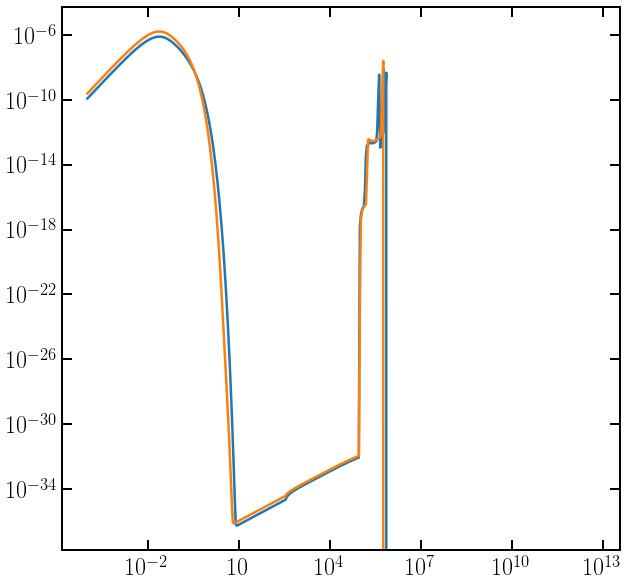

In [358]:
plt.figure()
ax = plt.gca()
ax.loglog()

i = 1

highengphot_spec_idl = Spectrum(
    data.field('energy')[0], 
    data.field('photonspectrum')[0,i*2], 
    rs=-1,
    spec_type='dNdE'
)

highengphot_spectra.plot(ax, ind=i, fac=1)
plt.plot(highengphot_spec_idl.eng, highengphot_spec_idl.N)

In [357]:
print(highengphot_spectra[i].toteng(bound_type='eng', bound_arr=np.array([10.2, 13.6])))
print(highengphot_spec_idl.toteng(bound_type='eng', bound_arr=np.array([10.2, 13.6]) ))

[3.00616763e-34]
[5.22049316e-34]


In [231]:
# utils.compare_arr([cmbloss_idl_old, cmbloss_idl_new])


#phys.CMB_eng_density
test_CMB_spec = spectools.discretize(lowengphot_spec_idl_new.eng, phys.CMB_spec, phys.TCMB(lowengphot_spec_idl_new.rs))
test_CMB_spec = (
    test_CMB_spec/test_CMB_spec.toteng()
    *(cmbloss_idl_new[i] + cmbloss_idl_new[i+1])
    *0.002/phys.hubble(lowengphot_spec_idl_new.rs)
    /(phys.nB*lowengphot_spec_idl_new.rs**3)
)

29.94005996002


[0.0001, 10000.0, 1e-13, 1e-05]

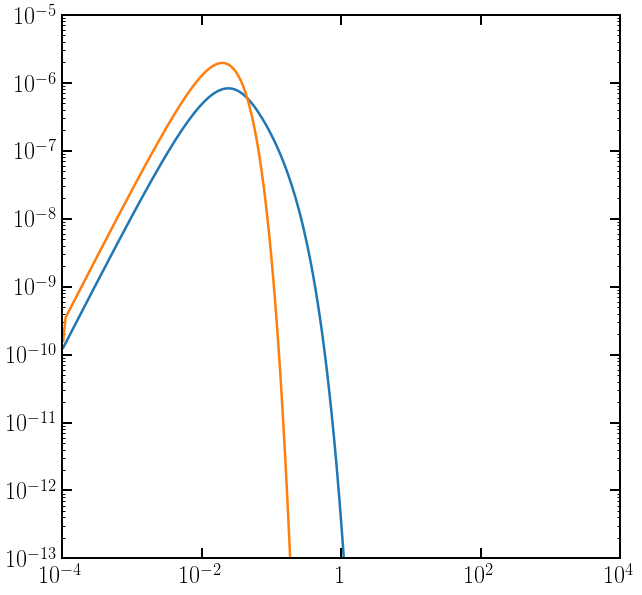

In [232]:
highengphot_spectra = a1[2]
lowengphot_spectra = a1[3]
lowengelec_spectra = a1[4]

plt.figure()
ax = plt.gca()

# highengphot_spectra.plot(ax, ind=1, fac=1)
# lowengphot_spectra.plot(ax, ind=0, fac=1)
# print(lowengphot_spectra.rs[0])
# plt.plot(highengphot_spec_idl.eng, phot_spec_idl.N)
plt.plot(lowengphot_spec_idl.eng, lowengphot_spec_idl.N)
plt.plot(test_CMB_spec.eng, test_CMB_spec.N)
print(lowengphot_spec_idl.rs)

ax.set_xscale('log')
ax.set_yscale('log')

plt.axis([1e-4, 1e4, 1e-13, 1e-5])

## Checking Compton Cooling Rate

[1.36715275e+21 4.32331659e+20 1.36715275e+20 4.32331659e+19
 1.36715275e+19 4.32331659e+18 1.36715275e+18 4.32331659e+17
 1.36715275e+17 4.32331659e+16 1.36715275e+16 4.32331659e+15
 1.36715275e+15 4.32331659e+14 1.36715275e+14 4.32331659e+13
 1.36715275e+13 4.32331659e+12]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.05719796e-19
 1.93510671e-20 5.04798290e-22 1.14152959e-23 2.34664864e-25
 4.54354819e-27 8.48591307e-29]
187.22574216588035


[100.0, 100000.0, 1e-05, 1000000000.0]

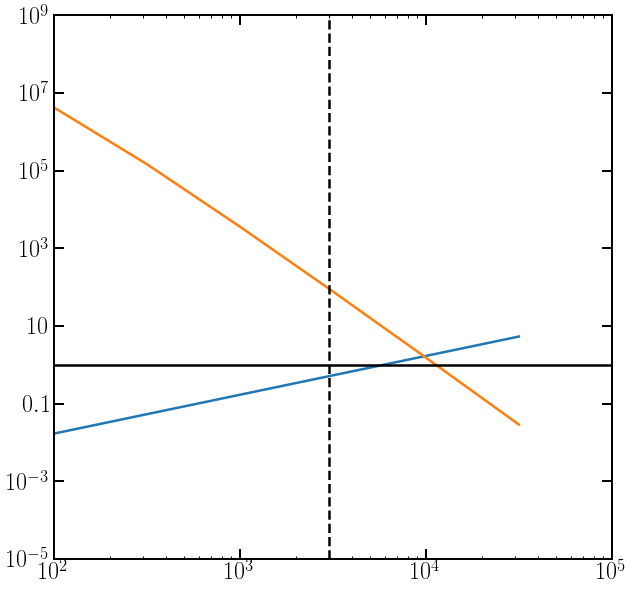

In [93]:
log_photeng = np.arange(-4, 5, 0.5)
photeng = 10**log_photeng

# xe = 1e-3
# rs = 600

xe = 0.999
rs = 1000
t_cool_compton = phys.me/(phys.nH*rs**3 * phys.thomson_xsec * phys.c * photeng)
total_ion_xsec = (
    (1-xe)*phys.photo_ion_xsec(photeng, 'H0') 
    + phys.nHe/phys.nH*phys.photo_ion_xsec(photeng,'He0') 
)
t_cool_photoion = np.divide(1,(phys.nH*rs**3 * total_ion_xsec * phys.c),
                            np.nan*np.ones_like(photeng), 
                            where=phys.photo_ion_xsec(photeng,'H0') > 0)
print(t_cool_compton)
print(phys.photo_ion_xsec(photeng, 'H0'))
print(xe*phys.nH*rs**3)
plt.figure()
plt.plot(photeng, (1/phys.hubble(rs))/t_cool_compton)
plt.plot(photeng, (1/phys.hubble(rs))/t_cool_photoion)

ax = plt.gca()
ax.axhline(y = 1, color='k', linestyle='solid')
ax.axvline(x = 3e3, color='k', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
plt.axis([1e2, 1e5, 1e-5, 1e9])

In [3]:
user = 'hongwan'

highengphot_tflist = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_photspec.raw", "rb"))
lowengphot_tflist  = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_lowengphotspec.raw", "rb"))
lowengelec_tflist  = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_lowengelecspec.raw", "rb"))
highengphot_tflist_before = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_photspec.raw", "rb"))

# This is a list of mwimp values used to generate highengphot_tflist
mwimp_arr = np.array(highengphot_tflist.in_eng)

# This shouldn't be necessary. There is one negative value somewhere. Check.
# for tf in highengphot_tflist:
#     tf.grid_vals[np.where(tf.grid_vals < 0)] = 0
# for tf in lowengphot_tflist:
#     tf.grid_vals[np.where(tf.grid_vals < 0)] = 0
    
highengphot_tflist.transpose()
lowengphot_tflist.transpose()
lowengelec_tflist.transpose()
highengphot_tflist_before.transpose()

In [4]:
print(highengphot_tflist.tftype)

rs


In [5]:
eng_ind = 299

eleceng = np.logspace( 1, 13, 500)
# photeng = np.logspace(-4, 13, 500)
photeng = highengphot_tflist.in_eng[1::10]
print(photeng)
phot_spec_init = spectools.rebin_N_arr(np.array([2]), 
                                      np.array([mwimp_arr[eng_ind]]),
                                      photeng)

#Split photeng into high and low energy. 
photeng_high = photeng[photeng > 3070]
photeng_low  = photeng[photeng <= 3070]

# Split eleceng into high and low energy. 
eleceng_high = eleceng[eleceng > 3500]
eleceng_low  = eleceng[eleceng <= 3500]

# highengphot_tflist.in_eng set to photeng_high

highengphot_tflist.at_val('in_eng', photeng_high, bounds_error=False, fill_value=0)

for tf in highengphot_tflist:
    tf.rebin(photeng_high)
    # Pad with zeros so that it becomes photeng x photeng. 
    tf._grid_vals = np.pad(tf.grid_vals, ((photeng_low.size, 0), (photeng_low.size, 0)), 'constant')
    tf._N_underflow = np.pad(tf._N_underflow, (photeng_low.size, 0), 'constant')
    tf._eng_underflow = np.pad(tf._eng_underflow, (photeng_low.size, 0), 'constant')
    tf._in_eng = photeng
    tf._eng = photeng
highengphot_tflist.eng = photeng
highengphot_tflist.in_eng = photeng


[3.21164435e+03 4.81590859e+03 7.56362822e+03 1.13867298e+04
 1.72056994e+04 2.73437075e+04 4.19080490e+04 6.21870922e+04
 9.82850796e+04 1.45544416e+05 2.22700862e+05 3.54914515e+05
 5.40591519e+05 8.24792927e+05 1.25692622e+06 1.90080107e+06
 2.96884485e+06 4.52782527e+06 7.03055569e+06 1.05120063e+07
 1.58422978e+07 2.52986000e+07 3.84995288e+07 5.87270941e+07
 8.97213998e+07 1.37213313e+08 2.09984100e+08 3.21489073e+08
 4.92345474e+08 7.54144585e+08 1.15529294e+09 1.76996268e+09
 2.71180588e+09 4.15496883e+09 6.36629152e+09 9.75464622e+09
 1.49465377e+10 2.29019435e+10 3.50918134e+10 5.37700471e+10
 8.23902385e+10 1.26244244e+11 1.93440642e+11 2.96404006e+11
 4.54172199e+11 6.95916465e+11 1.06633517e+12 1.63391851e+12
 2.50361230e+12 3.83622239e+12]


../darkhistory/spec/spectra.py:852: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


../darkhistory/spec/spectra.py:852: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


[100.0, 10000000000000.0, 1e-10, 10000000000.0]

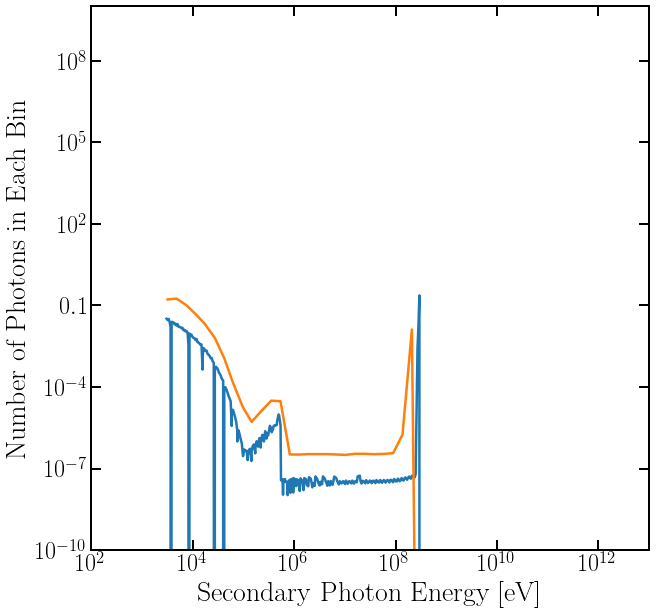

In [6]:
plt.figure()

ax = plt.gca()

eng_plot=3e8

highengphot_tflist_before[0].plot(ax, ind=eng_plot, indtype='in_eng')
a = copy.deepcopy(highengphot_tflist_before[0])
print(a)
a = a.at_in_eng(photeng, bounds_error=False, fill_value=0)
a.rebin(photeng)
a.plot(ax, ind=eng_plot, indtype='in_eng')
# highengphot_tflist[0].plot(ax, ind=eng_plot, indtype='in_eng')

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Secondary Photon Energy [eV]')
plt.ylabel('Number of Photons in Each Bin')

plt.axis([1e2, 1e13, 1e-10, 1e10])

In [267]:
eng = np.array([1, 10, 100, 1e3, 1e4])
new_eng = 10**np.arange(-2, 6, 0.5)
spec = np.array([2, 40, 600, 8000, 100000])
# spec = np.array([1, 1, 1])
test1 = Spectrum(eng, spec, spec_type='N')
test2 = Spectrum(eng, spec, spec_type='N')
print(test1.toteng())
test1.rebin(new_eng)
test2.rebin_smooth(new_eng)

print(test1.totN())
print(test1.toteng())
print(test2.totN())
print(test2.toteng())
print(test2.N)

1008060402.0000001
108642.00000000001
1008060402.0000001
108642.00000000001
1008060402.0000001
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.50000000e+00 6.58113883e-01 2.98418861e+01 1.31622777e+01
 4.46837722e+02 1.97434165e+02 5.95256584e+03 2.63245553e+03
 9.93675445e+04 0.00000000e+00 0.00000000e+00 0.00000000e+00]


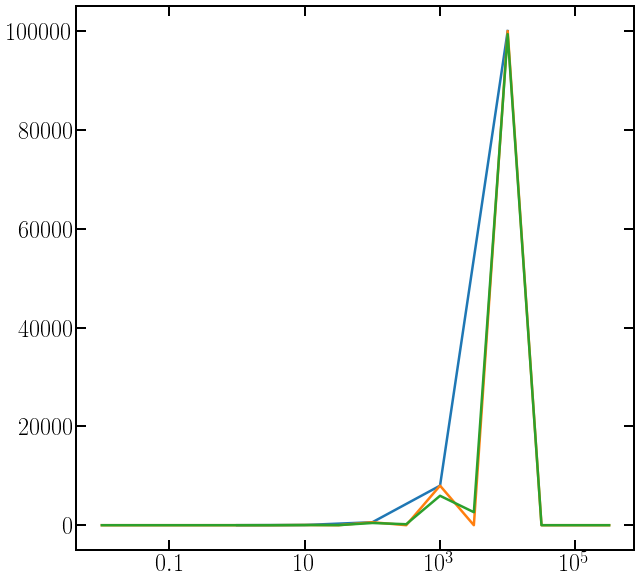

In [268]:
plt.figure()
plt.plot(eng, spec)
plt.plot(test1.eng, test1.N)
plt.plot(test2.eng, test2.N)

ax = plt.gca()
ax.set_xscale('log')